In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TODO:
Run multiple seeds with multiple values of readout (ra) and feature (fa)

Dans le yaml:
   feature_rotation:
      rotation_magnitude:             0 # TODO here is feature
    readout_rotation:
      rotation_magnitude:             1.5 # 3.14159   # TODO here is readout


0 <-> 0
1 <-> 3.14

In [23]:
wanted_path= "../../cata/run/results/seed_0"

In [24]:
RESULTS_PATH = wanted_path
SEEDS = range(2) # to adapt
print(SEEDS)

range(0, 2)


In [25]:
# data_logger can be changed into data_logger_network no pb

def get_organised_paths(results_path, seeds):
    #timestamps = os.listdir(results_path)
    
    data_logger_paths = {s: {} for s in seeds}
    experiments = os.listdir(results_path)
    print(experiments)
    
    #for timestamp in timestamps:
    #    timestamp_experiments = os.listdir(os.path.join(results_path, timestamp))
    for exp in experiments:
        split_name = exp.split("_")
        seed = int(split_name[1][1:])
        ra = float(split_name[2][2:])
        fa = float(split_name[3][2:])
        # data_logger_paths[seed][(fa, ra)] = os.path.join(results_path, timestamp, exp, str(seed), "data_logger.csv")
        #data_logger_paths[seed][(fa, ra)] = os.path.join(results_path, timestamp, exp, "data_logger_network.csv")
        data_logger_paths[seed][(fa, ra)] = os.path.join(results_path, exp, "data_logger_network.csv")
        
        
    return data_logger_paths

In [26]:
organised_paths = get_organised_paths(RESULTS_PATH, SEEDS)

['single_s0_ra0.1_fa0', 'single_s0_ra0.1_fa0.1', 'single_s1_ra0.1_fa0.2', 'single_s1_ra0.1_fa0.3']


In [27]:
organised_paths

{0: {(0.0,
   0.1): '../../cata/run/results/seed_0/test\\single_s0_ra0.1_fa0\\data_logger_network.csv',
  (0.1,
   0.1): '../../cata/run/results/seed_0/test\\single_s0_ra0.1_fa0.1\\data_logger_network.csv'},
 1: {(0.2,
   0.1): '../../cata/run/results/seed_0/test\\single_s1_ra0.1_fa0.2\\data_logger_network.csv',
  (0.3,
   0.1): '../../cata/run/results/seed_0/test\\single_s1_ra0.1_fa0.3\\data_logger_network.csv'}}

In [28]:
# import tempfile

# def test_get_organised_paths(wanted_path):

#     # with tempfile.TemporaryDirectory() as tmpdirname:
#     # create dummmy file structure
#     test_dates = ["2025-02-10-17-41-15", "2025-02-12-06-37-04"]
#     test_exp_names = {1: "exp_s1_ra0.2_fa0.1", 2: "exp_s2_ra0.2_fa0.8"}
#     for test_date in test_dates:
#         os.mkdir(os.path.join(wanted_path, test_date))
#         for seed, test_exp in test_exp_names.items():
#             # print(os.path.join(tmpdirname, test_date, test_exp, str(seed)))
#             # os.mkdir(os.path.join(tmpdirname, test_date, test_exp))
#             # os.mkdir(os.path.join(tmpdirname, test_date, test_exp, str(seed)))
#             # open(os.path.join(tmpdirname, test_date, test_exp, str(seed), "data_logger.csv"), 'a').close()
#             print(os.path.join(wanted_path, test_date, test_exp, str(seed)))
#             os.mkdir(os.path.join(wanted_path, test_date, test_exp))
#             os.mkdir(os.path.join(wanted_path, test_date, test_exp, str(seed)))
#             open(os.path.join(wanted_path, test_date, test_exp, str(seed), "data_logger.csv"), 'a').close()

#     test_data_logger_paths = get_organised_paths(wanted_path, range(3))

#     return test_data_logger_paths

In [29]:
#test_get_organised_paths(wanted_path)
list(organised_paths.values())[0]

{(0.0,
  0.1): '../../cata/run/results/seed_0/test\\single_s0_ra0.1_fa0\\data_logger_network.csv',
 (0.1,
  0.1): '../../cata/run/results/seed_0/test\\single_s0_ra0.1_fa0.1\\data_logger_network.csv'}

In [35]:
def get_metrics(df_paths, switch_step, final_step, threshold=None, second_task_cutoff=None):
    dfs = {k: pd.read_csv(df_path) for k, df_path in df_paths.items()}
    if switch_step is None:
        assert threshold is not None, "No switch step given, must give threshold instead."
        # infer from threshold
        # all first teacher errors should be the same, so take arbitrary one
        sample_df = dfs[list(dfs.keys())[0]]
        sample_df_first_error = np.array(sample_df.log_generalisation_error_0)
        switch_step = np.where(sample_df_first_error < threshold)[0][0] + 1
        if second_task_cutoff is not None:
            final_step = switch_step + second_task_cutoff
        else:
            final_step = len(sample_df)
    switch_errors = {k: df.log_generalisation_error_0[switch_step - 1] for k, df in dfs.items()}
    final_errors = {k: df.log_generalisation_error_0[final_step - 1] for k, df in dfs.items()}
    switch_errors_1 = {k: df.log_generalisation_error_1[switch_step - 1] for k, df in dfs.items()}
    final_errors_1 = {k: df.log_generalisation_error_1[final_step - 1] for k, df in dfs.items()}
    forgetting = {k: df.log_generalisation_error_0[final_step - 1] - df.log_generalisation_error_0[switch_step - 1] for k, df in dfs.items()}
    forgetting_rate = {k: np.mean([df.log_generalisation_error_0[switch_step - 1 + i + 1] - df.log_generalisation_error_0[switch_step - 1 + i] for i in range(10)]) for k, df in dfs.items()}
    max_forgetting = {k: np.amax(df.log_generalisation_error_0[switch_step - 1:final_step]) - df.log_generalisation_error_0[switch_step - 1] for k, df in dfs.items()}

    # print(switch_errors)
    # for k, df in dfs.items():
    #     print(df.log_generalisation_error_1)


    # TODO modify below when enough samples
    #second_threshold_steps = {k: np.where(df.log_generalisation_error_1 < switch_errors[k])[0][0] for k, df in dfs.items()}
    second_threshold_steps = {k: np.where(df.log_generalisation_error_1 < 4)[0][0] for k, df in dfs.items()}
    adjusted_forgetting = {k: df.log_generalisation_error_0[second_threshold_steps[k]] - df.log_generalisation_error_0[switch_step - 1] for k, df in dfs.items()}
    transfer = {k: df.log_generalisation_error_1[switch_step - 1] - df.log_generalisation_error_1[final_step - 1] for k, df in dfs.items()}
    transfer_rate = {k: np.mean([df.log_generalisation_error_1[switch_step - 1 + i] - df.log_generalisation_error_1[switch_step - 1 + i + 1] for i in range(10)]) for k, df in dfs.items()}
    max_transfer = {k: df.log_generalisation_error_1[switch_step - 1] - np.amin(df.log_generalisation_error_1[switch_step - 1:final_step]) for k, df in dfs.items()}
    return forgetting, forgetting_rate, max_forgetting, adjusted_forgetting, transfer, transfer_rate, max_transfer


In [31]:
def get_2d_plot_base(sample_metric):
    x, y = np.meshgrid(np.linspace(0, 1, 11), np.linspace(0, 1, 11))
    unique_sorted_keys = np.unique([i[0] for i in sorted(list(sample_metric.keys()), key=lambda x: float(x[0]))])
    x_overlap_map = {v: i for i, v in enumerate(unique_sorted_keys)}
    y_overlap_map = {v: i for i, v in enumerate(np.unique([i[1] for i in sorted(list(sample_metric.keys()), key=lambda x: float(x[1]))]))}
    return x_overlap_map, y_overlap_map

In [32]:
def get_z(value_dict):
    z = np.zeros((11, 11))
    
    x_overlap_map, y_overlap_map = get_2d_plot_base(value_dict)

    for k, f_value in value_dict.items():
        x_val = k[0]
        y_val = k[1]
        x_index = x_overlap_map[x_val]
        y_index = y_overlap_map[y_val]
        z[x_index][y_index] = f_value
    return z

In [33]:
path_save_figures = "figures/"

def plot2d(metric, metric_title, cmap, save_name):
    fig = plt.figure()
    plt.imshow(get_z(metric), origin="lower", extent=[0, 1, 0, 1], cmap=cmap)
    plt.xlabel("Feature Similarity")
    plt.ylabel("Readout Similarity")
    plt.title(metric_title)
    plt.colorbar()
    fig.show()
    fig.savefig(os.path.join(path_save_figures, save_name), dpi=100)

Seed 0 - Exemple de valeurs pour forgetting:
(0.0, 0.1): -0.12801522054901593
(0.1, 0.1): -0.12801522054901593


C:\Users\manon\AppData\Local\Temp\ipykernel_74664\2124042288.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


FileNotFoundError: [Errno 2] No such file or directory: 'figures/forgetting_seed_0.pdf'

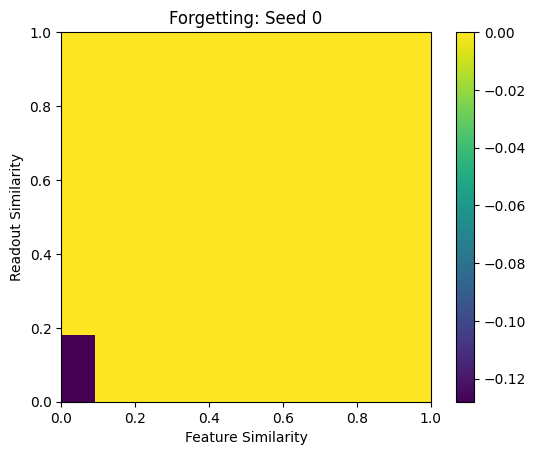

In [36]:
for seed, seed_dfs in organised_paths.items():
    seed_forgetting, seed_forgetting_rate, seed_max_forgetting, seed_adjusted_forgetting, seed_transfer, seed_transfer_rate, seed_max_transfer = get_metrics(df_paths=seed_dfs, switch_step=None, final_step=None, threshold=-4)
    
    print(f"Seed {seed} - Exemple de valeurs pour forgetting:")
    for key, value in seed_forgetting.items():
        print(f"{key}: {value}")

    
    plot2d(seed_forgetting, f"Forgetting: Seed {seed}", "viridis", f"forgetting_seed_{seed}.pdf")
    
    
    
    #plot2d(seed_forgetting_rate, f"Forgetting Rate: Seed {seed}", "viridis", f"forgetting_rate_seed_{seed}.pdf")
    #plot2d(seed_max_forgetting, f"Max Forgetting: Seed {seed}", "viridis", f"max_forgetting_seed_{seed}.pdf")
    #plot2d(seed_transfer, f"Transfer: Seed {seed}", "plasma", f"transfer_seed_{seed}.pdf")
    #plot2d(seed_transfer_rate, f"Transfer Rate: Seed {seed}", "plasma", f"transfer_rate_seed_{seed}.pdf")
    #plot2d(seed_max_transfer, f"Max Transfer: Seed {seed}", "plasma", f"max_transfer_seed_{seed}.pdf")